In [10]:
# 필요한 패키지 설치

from scipy.stats import shapiro
from statsmodels.stats.weightstats import ztest as ztest
import scipy.stats
from scipy import stats
from scipy.stats import ttest_ind
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300

In [2]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/sewonghwang/golf-ball-testing
df = pd.read_csv("datasets/Golf_test.csv")

# 데이터 샘플 확인
df.head()

,TypeA_before,TypeA_after,TypeB_before,TypeB_after,TypeC_before,TypeC_after
0,277,264,265,268,267,268
1,269,261,264,267,264,269
2,263,267,269,272,283,283
3,266,272,274,277,287,266
4,262,258,261,264,275,266


In [3]:
# 골프공 타입 별 통계값 확인

df.describe()

,TypeA_before,TypeA_after,TypeB_before,TypeB_after,TypeC_before,TypeC_after
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,268.460000,270.720000,273.600000,276.100000,270.360000,271.040000
std,9.817124,8.487782,8.566665,8.493094,8.385507,9.437139
min,250.000000,255.000000,258.000000,261.000000,255.000000,253.000000
25%,262.000000,264.000000,266.250000,269.000000,263.250000,265.000000
50%,266.000000,271.000000,273.500000,276.500000,268.500000,268.000000
75%,275.750000,275.000000,278.000000,280.000000,275.750000,277.750000
max,289.000000,289.000000,292.000000,295.000000,289.000000,291.000000


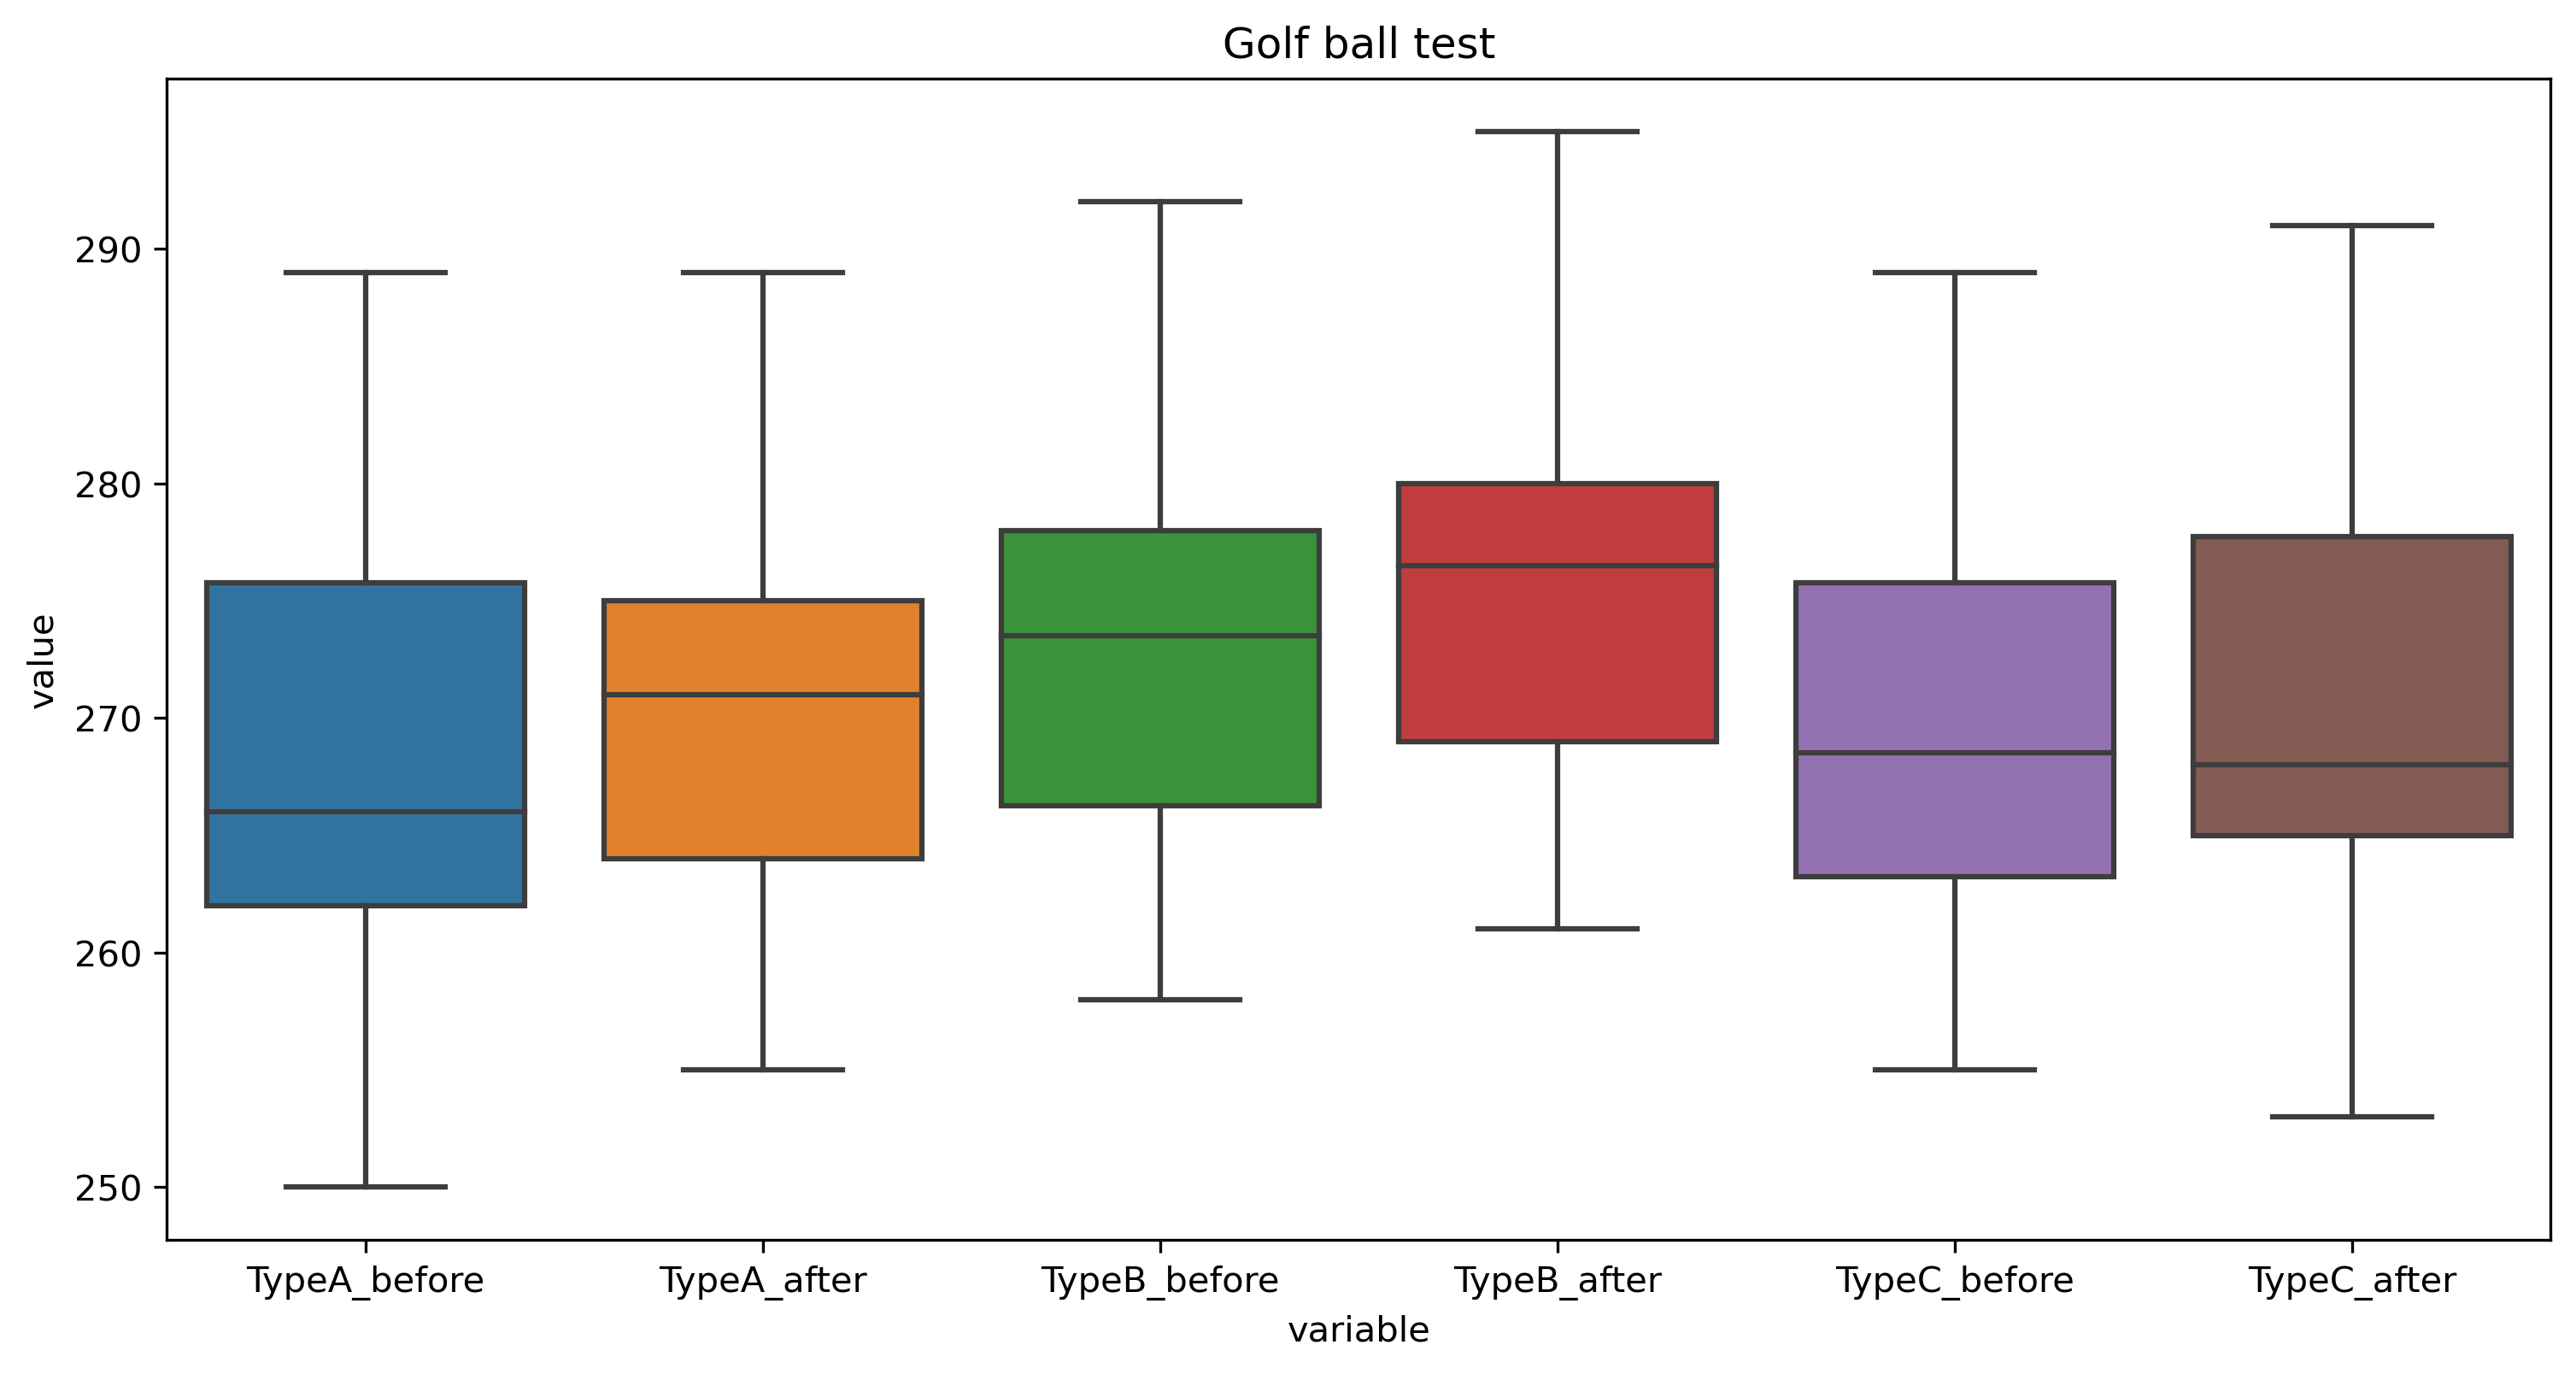

In [4]:
# 그룹 별 박스 플롯 시각화

df2 =  pd.melt(df)
plt.figure(figsize=(12,6))
sns.boxplot(x='variable', y='value', data=df2)
plt.title('Golf ball test')
plt.show()

In [5]:
# 데이터 정규성 검정

print(shapiro(df['TypeA_before']))
print(shapiro(df['TypeA_after']))
print(shapiro(df['TypeB_before']))
print(shapiro(df['TypeB_after']))
print(shapiro(df['TypeC_before']))
print(shapiro(df['TypeC_after']))

ShapiroResult(statistic=0.965537965297699, pvalue=0.15155252814292908)
ShapiroResult(statistic=0.9728281497955322, pvalue=0.3005155026912689)
ShapiroResult(statistic=0.9730034470558167, pvalue=0.30533552169799805)
ShapiroResult(statistic=0.9693009257316589, pvalue=0.2167525738477707)
ShapiroResult(statistic=0.9595518112182617, pvalue=0.08513051271438599)
ShapiroResult(statistic=0.9469832181930542, pvalue=0.02568192593753338)


In [9]:
# 데이터 등분산성 검정
stats.bartlett(df['TypeA_before'],df['TypeA_after'],
               df['TypeB_before'],df['TypeB_after'],
               df['TypeC_before'],df['TypeC_after'])

BartlettResult(statistic=2.232358764161634, pvalue=0.8161484218330712)

In [6]:
# Z-test (TypeA_Before와 TypeA_After)
ztest(df['TypeA_before'], x2=df['TypeA_after'], value=0, alternative='two-sided')

(-1.2313987682249838, 0.21817375744980994)

In [7]:
# Z-test (TypeA_Before와 TypeB_before)

# 양측검정
print(ztest(df['TypeA_before'], x2=df['TypeB_before'], value=0, alternative='two-sided'))

# 단측검정(왼꼬리검정)
print(ztest(df['TypeA_before'], x2=df['TypeB_before'], value=0, alternative='smaller'))

# 단측검정(오른꼬리검정)
print(ztest(df['TypeA_before'], x2=df['TypeB_before'], value=0, alternative='larger'))

(-2.789495974658115, 0.005279015267745852)
(-2.789495974658115, 0.002639507633872926)
(-2.789495974658115, 0.9973604923661271)


In [8]:
# 대응표본 t검정 수행
scipy.stats.ttest_rel(df['TypeA_before'],df['TypeA_after'])

Ttest_relResult(statistic=-1.221439914972903, pvalue=0.22776376448687602)

In [9]:
# 독립표본 t검정 수행
ttest_ind(df['TypeA_before'],df['TypeB_before'], equal_var=False)

Ttest_indResult(statistic=-2.789495974658115, pvalue=0.0063642243501398285)